In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
nfl_score = pd.read_csv('Datos/nfl_scores_v2.csv')
nfl_score

,Unnamed: 0,index,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,...,avgyd_home,avgyd_away,effdown_home,effdown_away,penalized_home,penalized_away,timepos_home,timepos_away,drives,overtime
0,0,7095,9/12/1999,1999,1,False,Atlanta Falcons,14,17,Minnesota Vikings,...,9.396693,6.481902,0.379310,0.279412,4.0,9.0,0.450636,0.549364,20.0,0.0
1,1,7096,9/12/1999,1999,1,False,Chicago Bears,20,17,Kansas City Chiefs,...,1.339015,2.119453,0.301887,0.268657,6.0,7.0,0.456830,0.543170,23.0,0.0
2,2,7097,9/12/1999,1999,1,False,Cleveland Browns,0,43,Pittsburgh Steelers,...,0.746667,5.567066,0.071429,0.365591,4.0,4.0,0.200167,0.799833,22.0,0.0
3,3,7098,9/12/1999,1999,1,False,Green Bay Packers,28,24,Oakland Raiders,...,3.246723,3.403770,0.357143,0.278689,7.0,6.0,0.537742,0.462258,25.0,0.0
4,4,7099,9/12/1999,1999,1,False,Indianapolis Colts,31,14,Buffalo Bills,...,6.366402,3.134750,0.293103,0.283333,7.0,13.0,0.549321,0.450679,24.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6416,6416,13511,1/22/2023,2022,Division,True,Buffalo Bills,10,27,Cincinnati Bengals,...,4.259077,5.647663,0.285714,0.410959,8.0,2.0,0.435000,0.565000,17.0,0.0
6417,6417,13512,1/22/2023,2022,Division,True,San Francisco 49ers,19,12,Dallas Cowboys,...,4.140659,4.113333,0.313433,0.241935,3.0,7.0,0.548056,0.451944,19.0,0.0
6418,6418,13513,1/29/2023,2022,Conference,True,Kansas City Chiefs,23,20,Cincinnati Bengals,...,4.577976,3.080568,0.333333,0.276923,4.0,9.0,0.547957,0.452043,21.0,0.0
6419,6419,13514,1/29/2023,2022,Conference,True,Philadelphia Eagles,31,7,San Francisco 49ers,...,3.717381,3.070000,0.352113,0.244444,4.0,11.0,0.623889,0.376111,20.0,0.0


In [3]:
# Creamos diccionario de los equipos de la NFL
nfl_teams = pd.read_csv('Datos/nfl_teams.csv')
names = dict(zip(nfl_teams["team_name"], nfl_teams["team_id"]))

# Prueba
names["Jacksonville Jaguars"]

'JAX'

In [4]:
# nfl_score.isnull().sum()
nfl_miss = nfl_score[nfl_score["drives"].isnull()]
nfl_miss

,Unnamed: 0,index,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,...,avgyd_home,avgyd_away,effdown_home,effdown_away,penalized_home,penalized_away,timepos_home,timepos_away,drives,overtime
10,10,7105,9/12/1999,1999,1,False,St. Louis Rams,27,10,Baltimore Ravens,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
258,258,7353,1/30/2000,1999,Superbowl,True,St. Louis Rams,23,16,Tennessee Titans,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
295,295,7390,9/17/2000,2000,3,False,Kansas City Chiefs,42,10,San Diego Chargers,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
338,338,7433,10/8/2000,2000,6,False,Miami Dolphins,22,13,Buffalo Bills,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
517,517,7612,1/28/2001,2000,Superbowl,True,Baltimore Ravens,34,7,New York Giants,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
776,776,7871,2/3/2002,2001,Superbowl,True,St. Louis Rams,17,20,New England Patriots,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
1043,1043,8138,1/26/2003,2002,Superbowl,True,Oakland Raiders,21,48,Tampa Bay Buccaneers,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
1609,1609,8704,9/19/2005,2005,2,False,New York Giants,27,10,New Orleans Saints,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
2111,2111,9206,2/4/2007,2006,Superbowl,True,Indianapolis Colts,29,17,Chicago Bears,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
3970,3970,11065,1/4/2014,2013,Wildcard,True,Indianapolis Colts,45,44,Kansas City Chiefs,...,0.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0,NaN,0.0


In [5]:
nfl_miss["team_home"].unique()

array(['St. Louis Rams', 'Kansas City Chiefs', 'Miami Dolphins',
       'Baltimore Ravens', 'Oakland Raiders', 'New York Giants',
       'Indianapolis Colts', 'Philadelphia Eagles', 'Cincinnati Bengals',
       'Green Bay Packers', 'New England Patriots', 'Carolina Panthers',
       'Denver Broncos', 'Seattle Seahawks'], dtype=object)

<AxesSubplot:xlabel='schedule_week', ylabel='Count'>

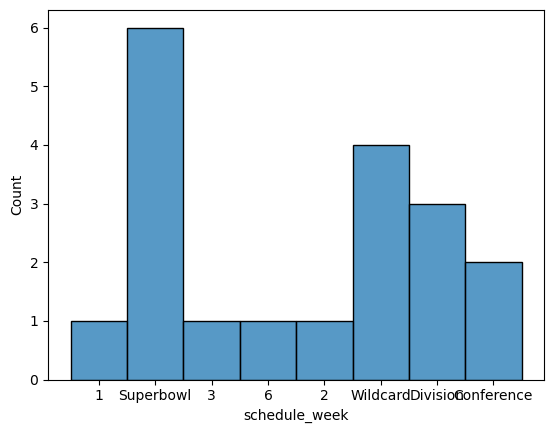

In [12]:
sb.histplot(data=nfl_miss, x="schedule_week")

In [7]:
# Leemos los datos de las jugadas
plays_data = pd.read_csv('Datos/nflplays_1999_to_2022_min.csv', low_memory=False)
plays_data['game_date'] =  pd.to_datetime(plays_data['game_date'])

plays_data.head()

,game_date,season,home_team,touchdown,posteam,extra_point_result,two_point_conv_result,safety,field_goal_result,penalty_team,penalty,drive,drive_first_downs,drive_play_count,drive_time_of_possession,ydsnet,qtr,week
0,1999-09-12,1999,PHI,0.0,PHI,NaN,NaN,0.0,NaN,NaN,0.0,1.0,0.0,3.0,1:53,6.0,1,1
1,1999-09-12,1999,PHI,0.0,PHI,NaN,NaN,0.0,NaN,NaN,0.0,1.0,0.0,3.0,1:53,6.0,1,1
2,1999-09-12,1999,PHI,0.0,PHI,NaN,NaN,0.0,NaN,NaN,0.0,1.0,0.0,3.0,1:53,6.0,1,1
3,1999-09-12,1999,PHI,0.0,PHI,NaN,NaN,0.0,NaN,PHI,1.0,1.0,0.0,3.0,1:53,6.0,1,1
4,1999-09-12,1999,PHI,0.0,PHI,NaN,NaN,0.0,NaN,NaN,0.0,1.0,0.0,3.0,1:53,6.0,1,1


In [8]:
# De las jugadas, los equipos que juegan en casa
plays_data["home_team"].unique()

array(['PHI', 'IND', 'NO', 'TEN', 'WAS', 'SEA', 'CHI', 'DEN', 'ATL',
       'NYJ', 'TB', 'GB', 'CLE', 'JAX', 'MIA', 'DAL', 'KC', 'DET', 'NE',
       'CAR', 'SF', 'BUF', 'MIN', 'BAL', 'CIN', 'NYG', 'LA', 'LV', 'LAC',
       'PIT', 'ARI', 'HOU'], dtype=object)

In [9]:
# De los scores, los equipos que juegan en casa
names.values()

dict_values(['ARI', 'ATL', 'IND', 'BAL', 'NE', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE', 'DAL', 'DEN', 'DET', 'GB', 'TEN', 'HOU', 'IND', 'JAX', 'KC', 'LV', 'LAC', 'LV', 'LA', 'MIA', 'MIN', 'NE', 'NO', 'NYG', 'NYJ', 'LV', 'PHI', 'ARI', 'PIT', 'LAC', 'SF', 'SEA', 'ARI', 'LA', 'TB', 'TEN', 'TEN', 'WAS', 'WAS', 'WAS'])

In [10]:
# ¿Cuáles equipos no estan en el dicionario?
np.setdiff1d(plays_data["home_team"].unique(), [*names.values()])

array([], dtype=object)

In [11]:
for row in nfl_miss.to_numpy():
    print(row)
    team_home = names[row[6]]
    team_away = names[row[9]]
    print(team_home, team_away)
    print(row[2])
    plays = plays_data[(plays_data["season"] == row[3]) &
                          (plays_data["posteam"] == "BAL")]
    print(plays["home_team"].unique())
    break

[10 7105 '9/12/1999' 1999 '1' False 'St. Louis Rams' 27 10
 'Baltimore Ravens' 'PICK' 0.0 39.0 'Edward Jones Dome' False 72.0 0.0 nan
 'indoor' 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 nan 0.0]
LA BAL
9/12/1999
['BAL' 'ATL' 'TEN' 'CLE' 'JAX' 'CIN' 'PIT' 'NE']
